In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Membaca file csv
df = pd.read_csv('C:/Users/Muhammad Iqbal/Downloads/flight.csv') #disesuaikan denagn path pada masing-masing
df.shape

(62988, 23)

## Statistic Desc.

In [26]:
#Melihat kolom apa saja yang tersedia
df.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


In [27]:
#Melihat info keseluruhan data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Terdapat ketidaksesuaian tipe data date namun ternyata adalah object diantaranya adalah:
1. FFP_DATE
2. FIRST_FLIGHT_DATE
3. LAST_FLIGHT_DATE
4. LOAD_TIME

Terhadapa tipe data yang tidak sesuai maka perlu dilakukan penyesuian merubah tpe data object menjadi date

In [28]:
#Merubah tipe data objek menjadi date
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'],  errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'],  errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')



In [29]:
#Melihat data kosong
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Terdapat banyak data yang kosong diantaranya ada pada kolom:
1. WORK_CITY     =        2269
2. WORK_PROVINCE =        3248
3. WORK_COUNTRY  =        26
4. AGE           =        420
5. SUM_YR_1      =        551
6. SUM_YR_2      =        138


Untuk data yang kosong perlu penanganan khusus jika ingin digunakan.

In [30]:
df.duplicated(subset=['MEMBER_NO']).sum()

0

Tidak ada data duplikat pada dataset

In [31]:
#Mengelompokkan data
cats= ["GENDER", "WORK_CITY", "WORK_PROVINCE","WORK_COUNTRY" ]
nums= ["FFP_TIER","AGE","FLIGHT_COUNT","BP_SUM",
"SUM_YR_1",
"SUM_YR_2",
"SEG_KM_SUM",
"LAST_TO_END",
"AVG_INTERVAL",
"MAX_INTERVAL",
"EXCHANGE_COUNT",
"avg_discount",
"Points_Sum",
"Point_NotFlight" ]
nums_1=["FFP_TIER","AGE","FLIGHT_COUNT","BP_SUM",
"SUM_YR_1",
"SUM_YR_2",
"SEG_KM_SUM",
"LAST_TO_END"]
nums_2=["AVG_INTERVAL",
"MAX_INTERVAL",
"EXCHANGE_COUNT",
"avg_discount",
"Points_Sum",
"Point_NotFlight"]
date= ["FFP_DATE",
"FIRST_FLIGHT_DATE",
"LAST_FLIGHT_DATE",
"LOAD_TIME"]

In [32]:
#Melihat informasi pada kolom kategori
df_cats = df[cats].copy()
df_cats.describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62985,60719,59740,62962
unique,2,3234,1165,118
top,Male,guangzhou,guangdong,CN
freq,48134,9386,17509,57748


In [33]:
#Melihat informasi pada kolom numerikal
df[nums].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [34]:
#Melihat informasi pada kolom date
df[date].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,LOAD_TIME
count,62988,62988,62567,62988
mean,2010-03-06 23:58:48.672128,2010-09-01 17:59:44.911411968,2013-10-06 15:32:03.103233280,2014-03-30 23:59:59.999999744
min,2004-11-01 00:00:00,1905-12-31 00:00:00,2012-04-01 00:00:00,2014-03-31 00:00:00
25%,2008-04-12 00:00:00,2008-12-14 18:00:00,2013-07-07 00:00:00,2014-03-31 00:00:00
50%,2010-10-08 00:00:00,2011-04-23 00:00:00,2013-12-14 00:00:00,2014-03-31 00:00:00
75%,2012-03-29 00:00:00,2012-07-26 00:00:00,2014-03-03 00:00:00,2014-03-31 00:00:00
max,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


## Analisa Univariate

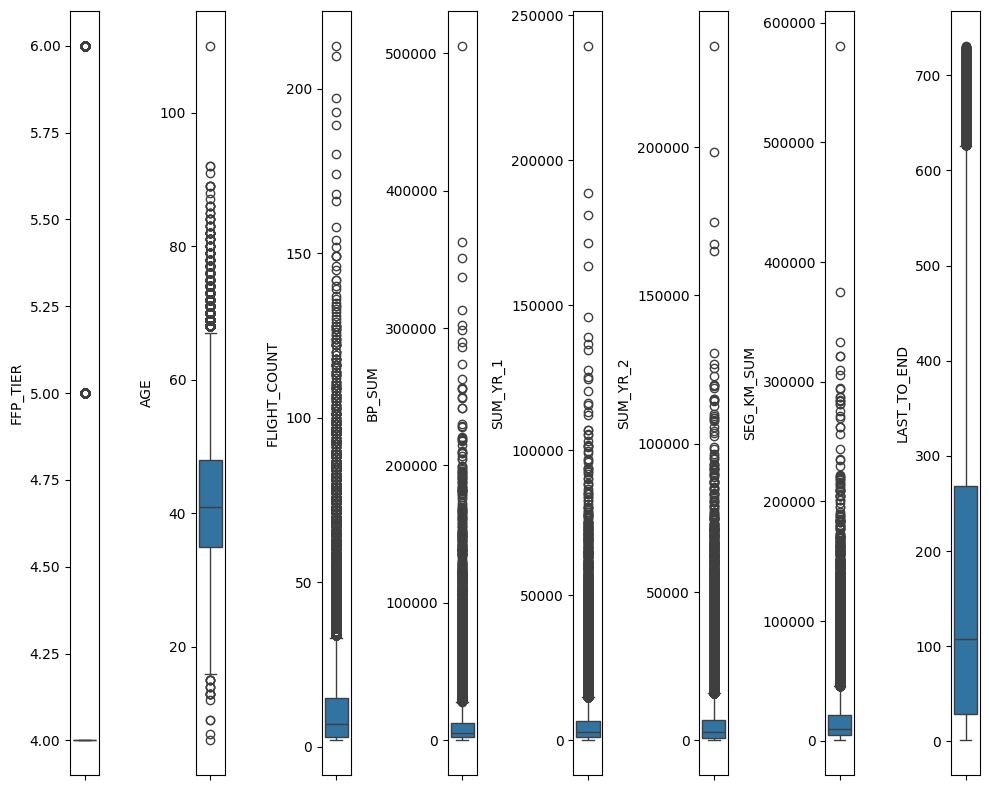

In [35]:
plt.figure(figsize=(10,8))
for i in range(0, len(nums_1)):
    plt.subplot(1, len(nums_1), i+1)
    sns.boxplot(y=df[nums_1[i]], orient='v')
    plt.tight_layout()

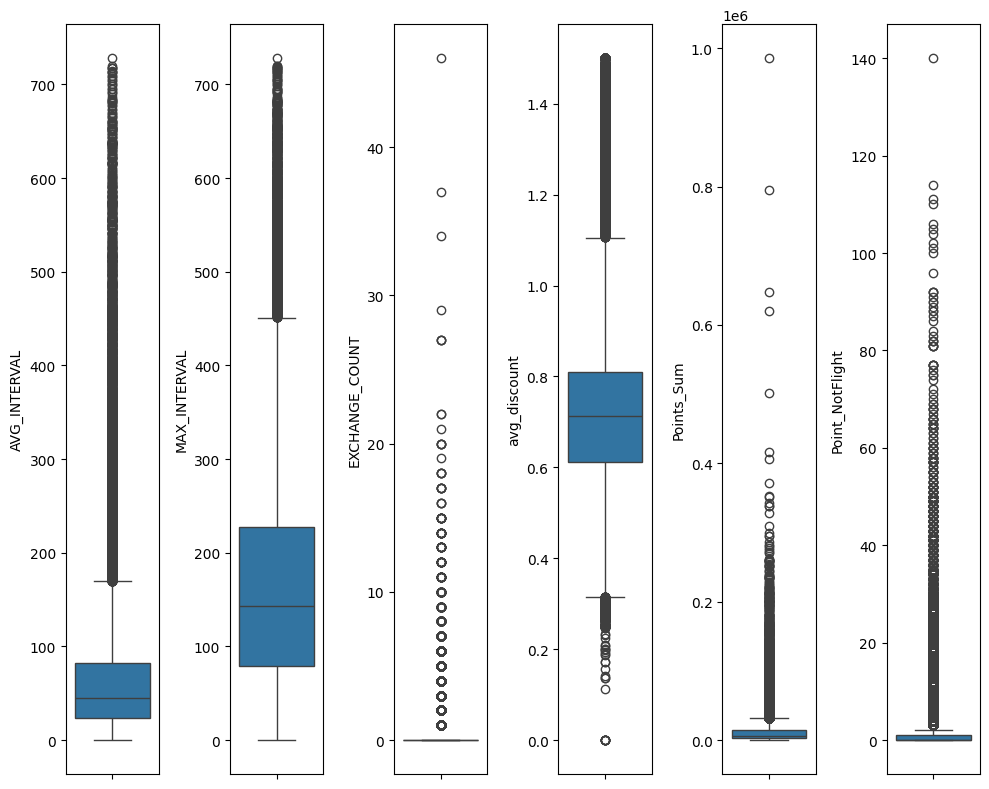

In [41]:
plt.figure(figsize=(10,8))
for i in range(0, len(nums_2)):
    plt.subplot(1, len(nums_2), i+1)
    sns.boxplot(y=df[nums_2[i]], orient='v')
    plt.tight_layout()

Terlihat pada boxplot terdapat banyak nilai outlier pada data, maka diperlukan penangan terhadap outlier.

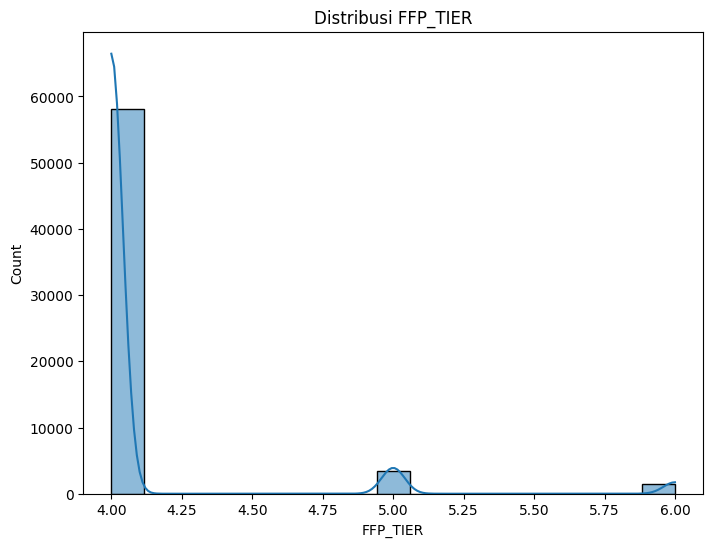

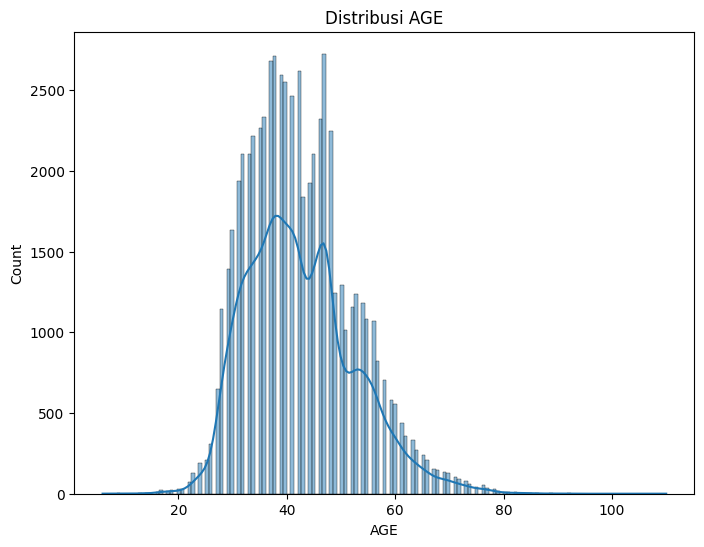

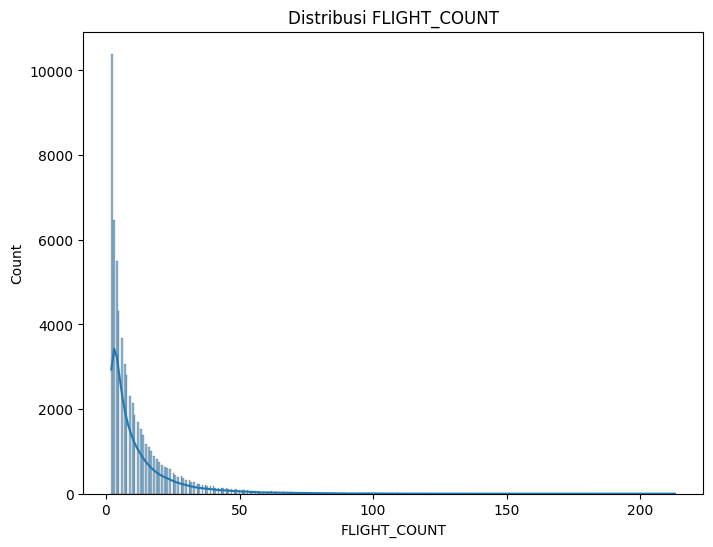

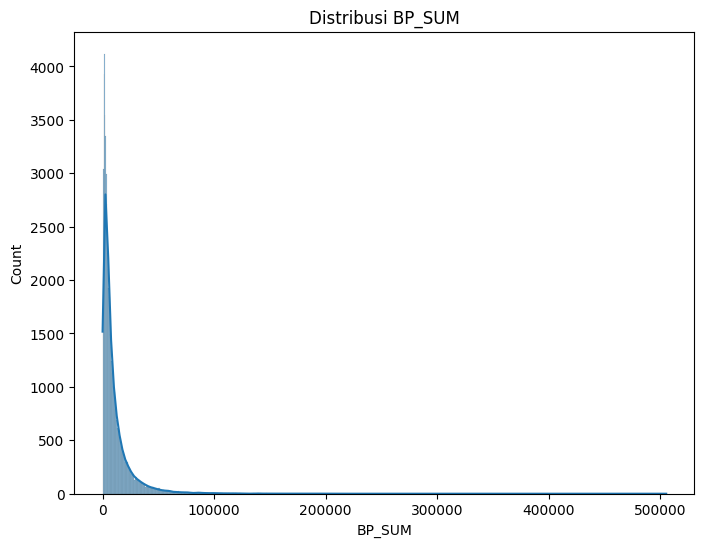

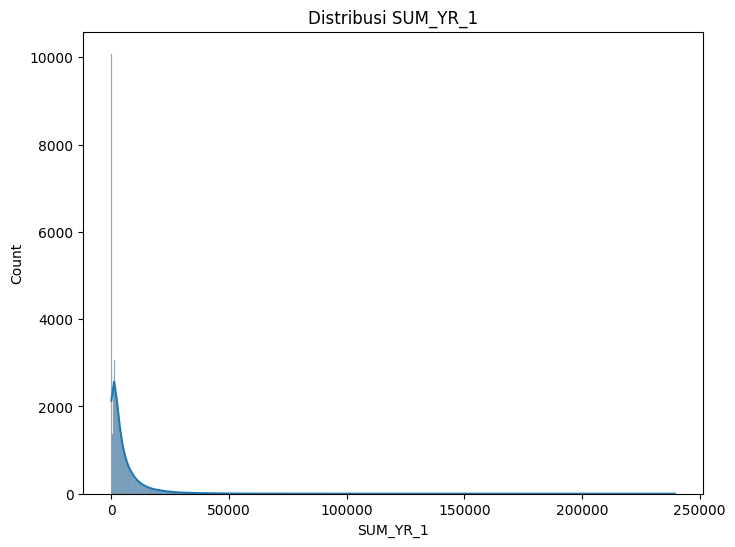

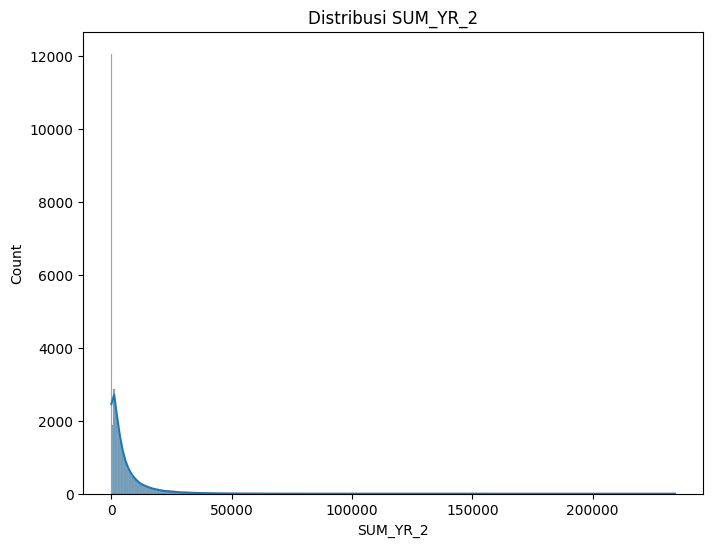

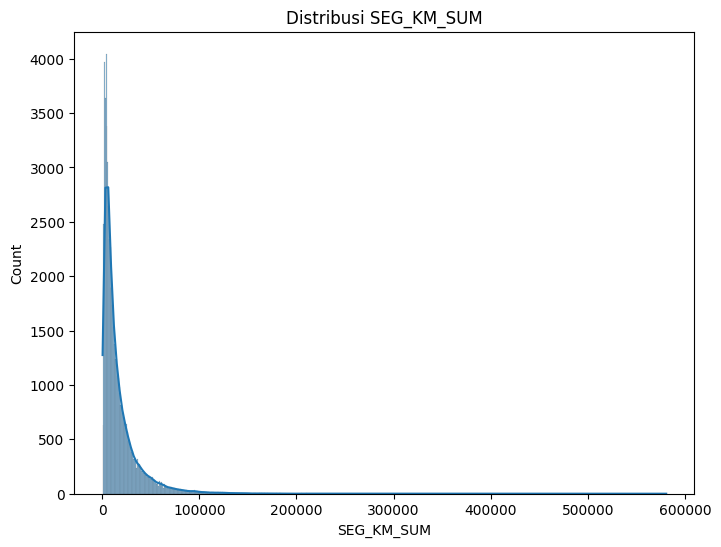

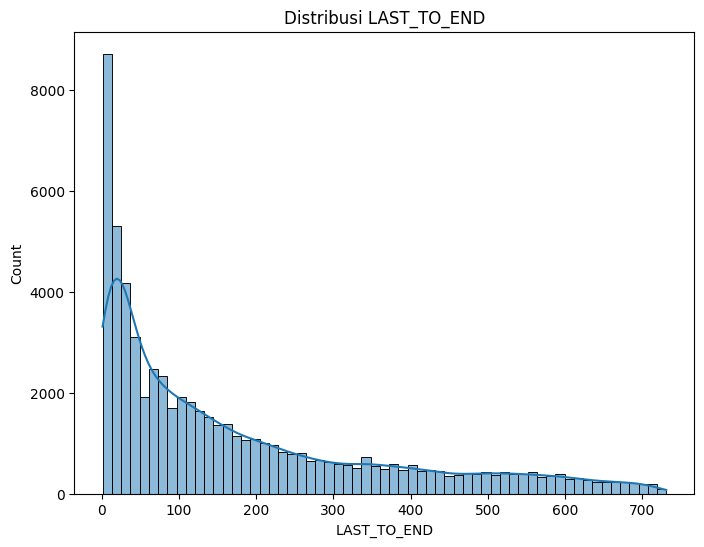

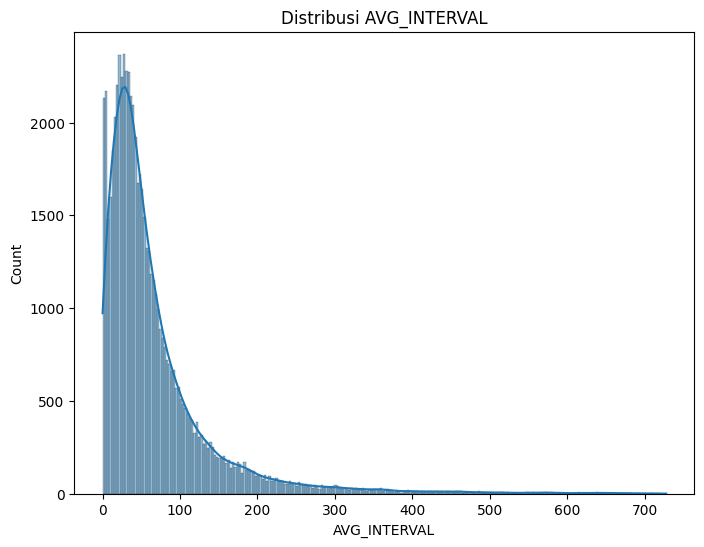

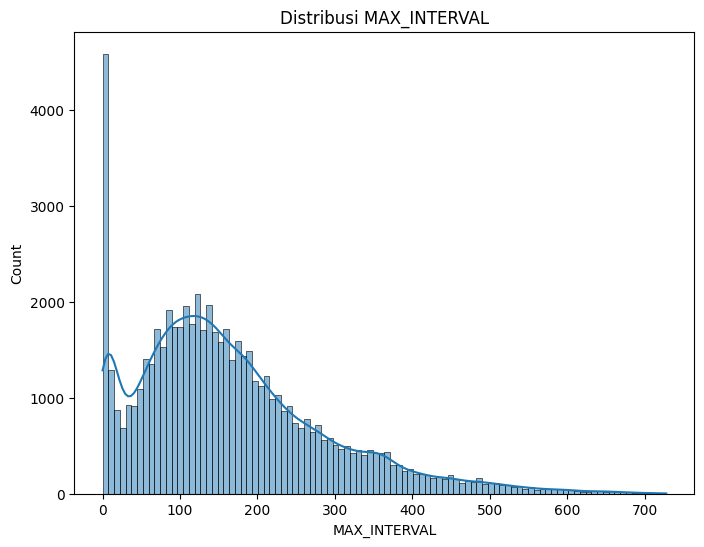

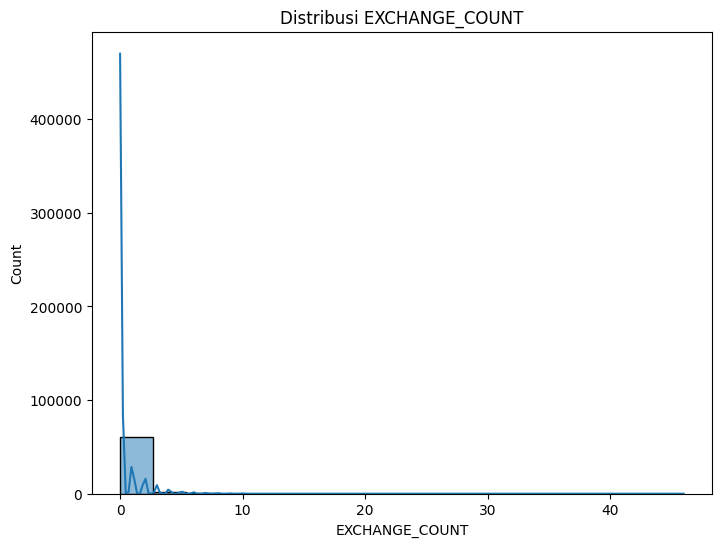

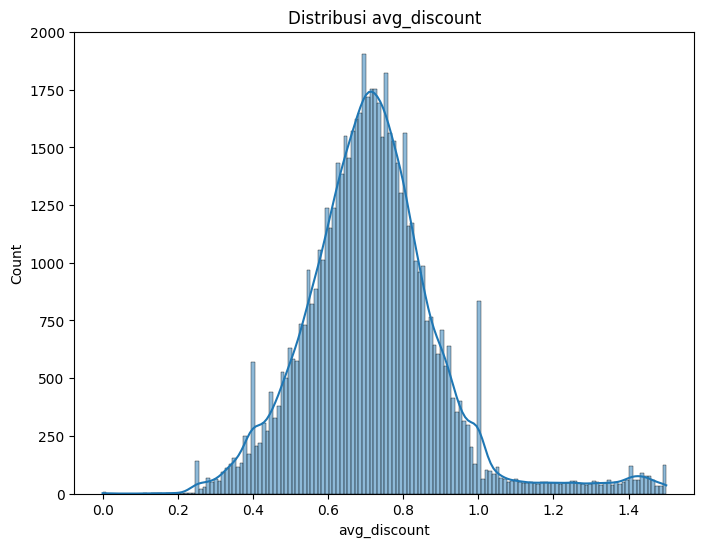

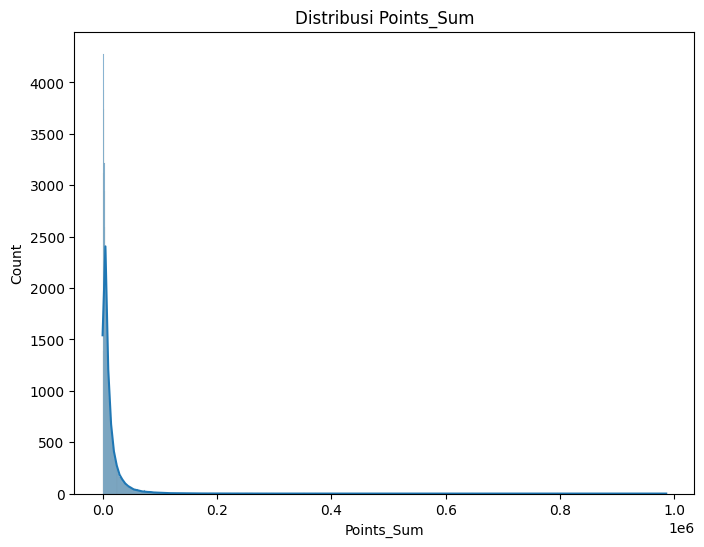

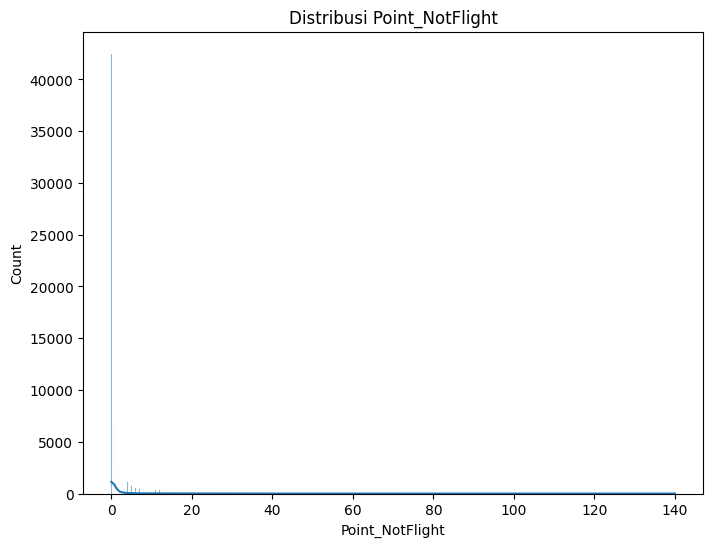

In [36]:
#Visualisasi distribusi setiap kolom
for column in nums:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

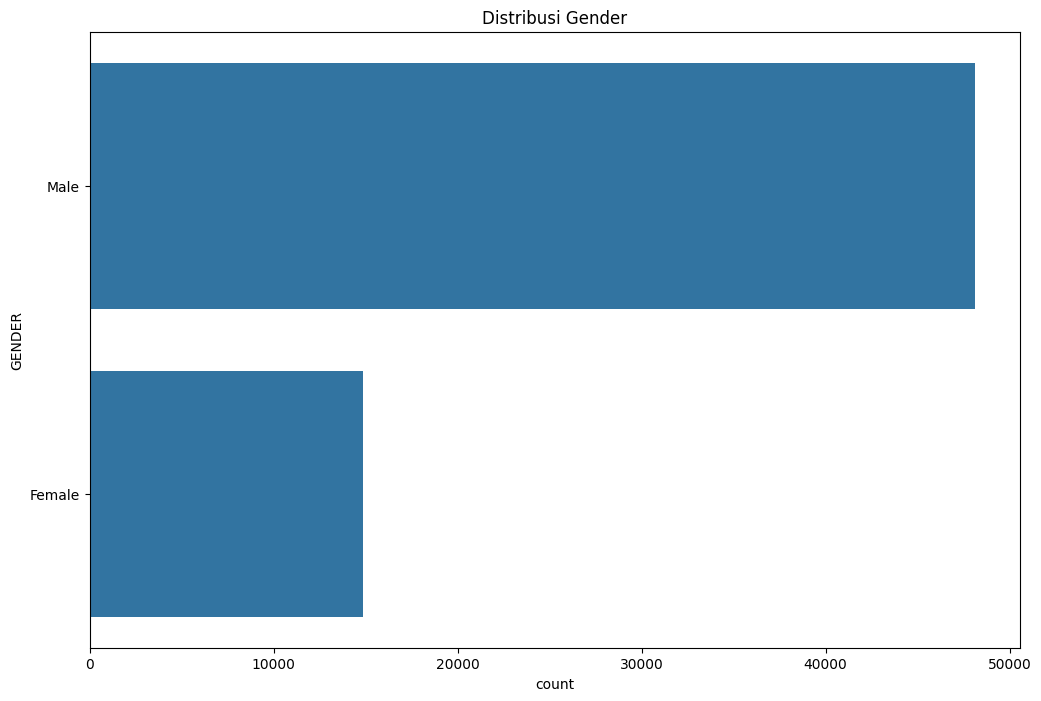

In [37]:
# Visualisasi data kategorikal dengan barplot horizontal
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='GENDER', order=df['GENDER'].value_counts().index)
plt.title('Distribusi Gender')
plt.show()

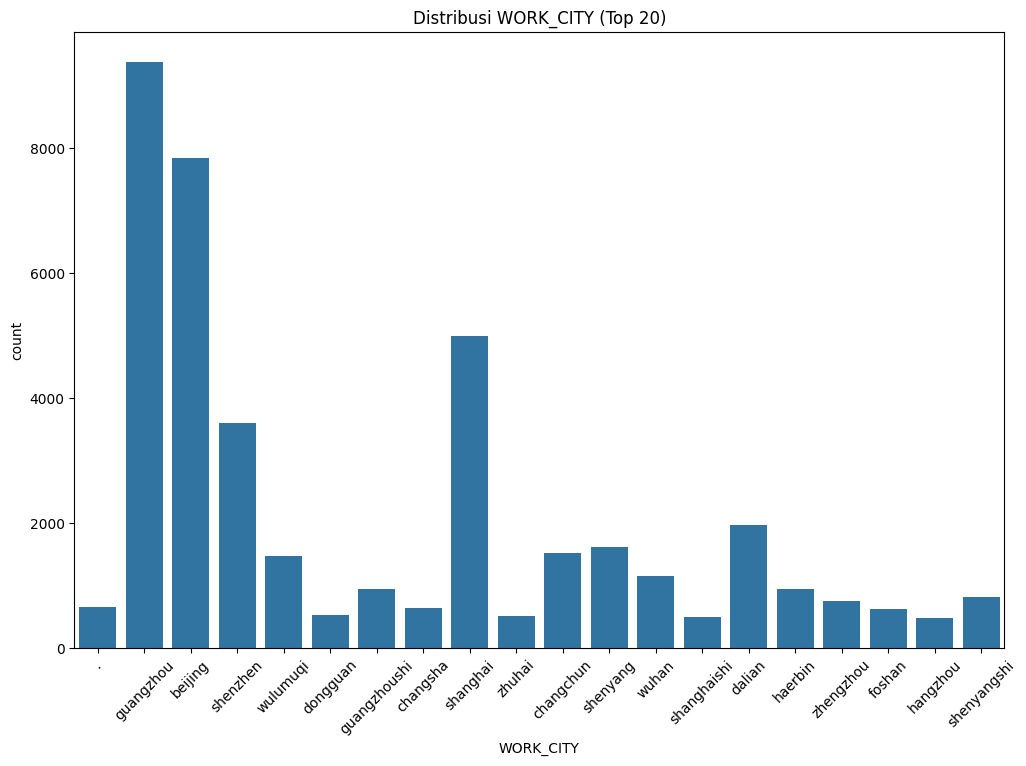

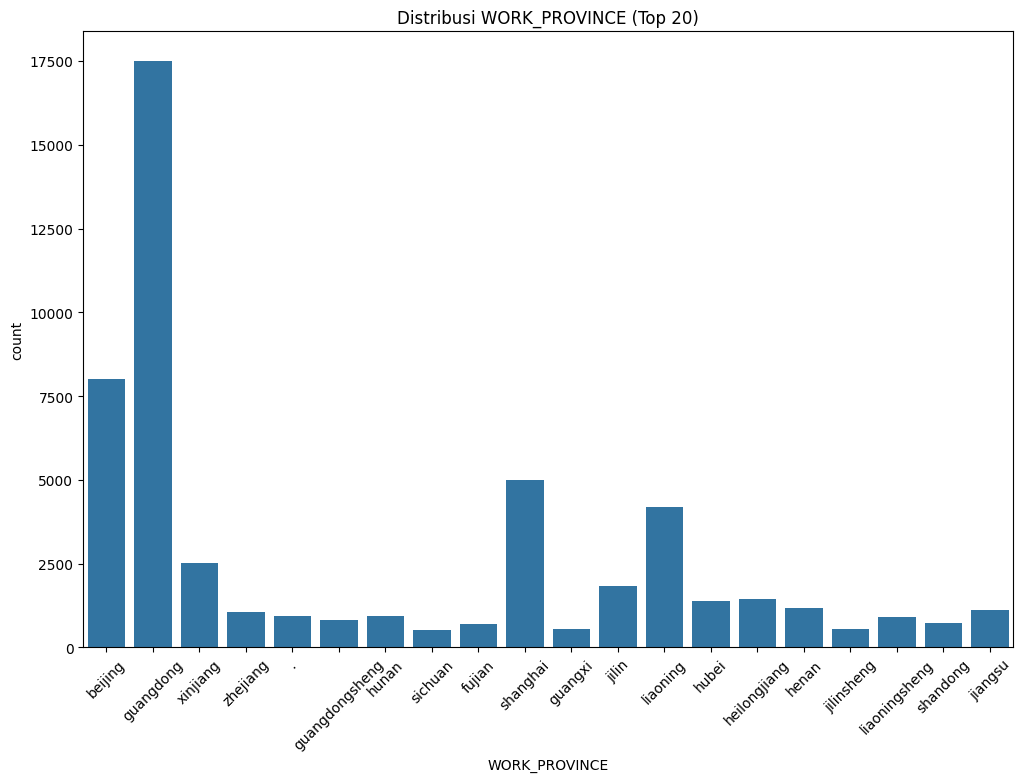

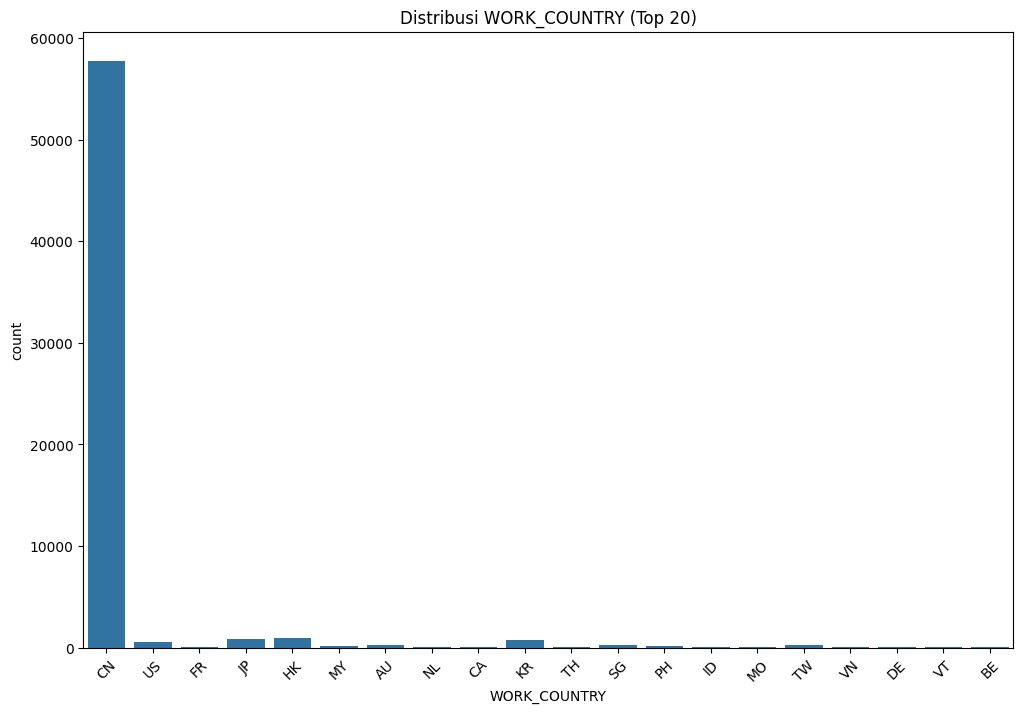

In [38]:
# Kolom-kolom kategorikal yang ingin dihitung top 20 nilai uniknya
kat = ["WORK_CITY", "WORK_PROVINCE","WORK_COUNTRY"]
# Melakukan looping untuk setiap kolom kategorikal
for cat_column in kat:
    # Menghitung top 20 nilai unik
    top_n_values = df[cat_column].value_counts().head(20).index
    
    # Membuat dataframe yang berisi hanya data dengan top 20 nilai unik
    df_filtered = df[df[cat_column].isin(top_n_values)]

    # Visualisasi data kategorikal yang telah difilter
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df_filtered, x=cat_column)
    plt.title(f'Distribusi {cat_column} (Top 20)')
    plt.xticks(rotation=45)
    plt.show()

Terlihat jumlah laki-laki lebih dominan dibanding perempuan dalam data ini, dapat dilihat juga daerah mana saja yang paling banyak penyebarannya.

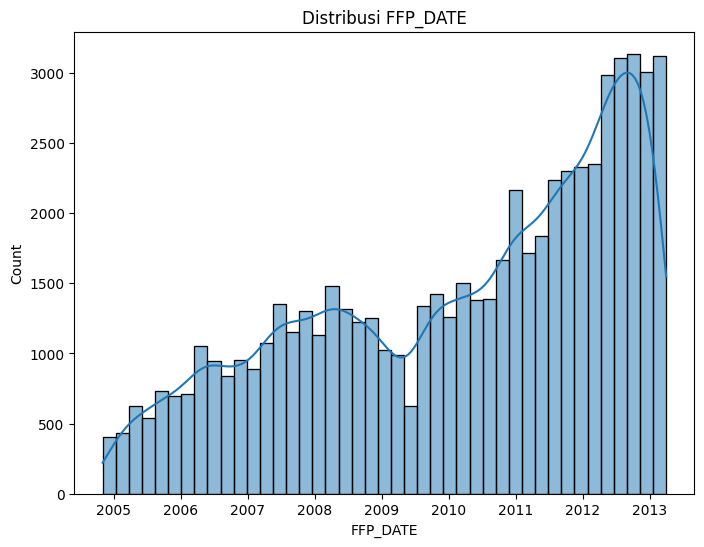

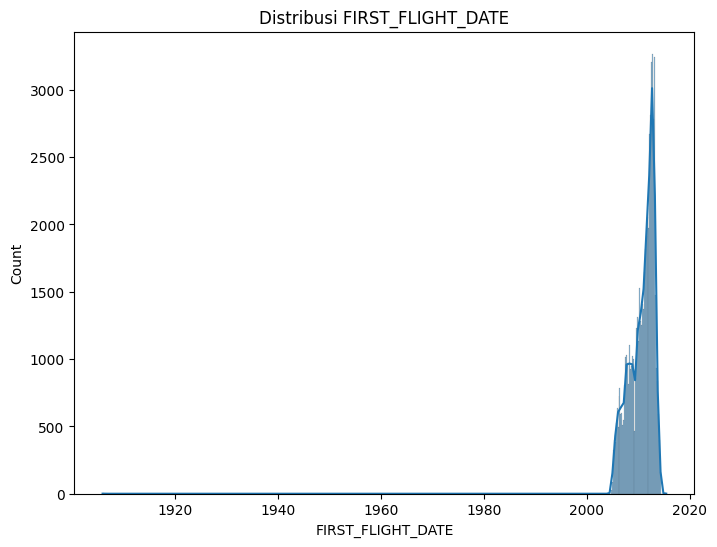

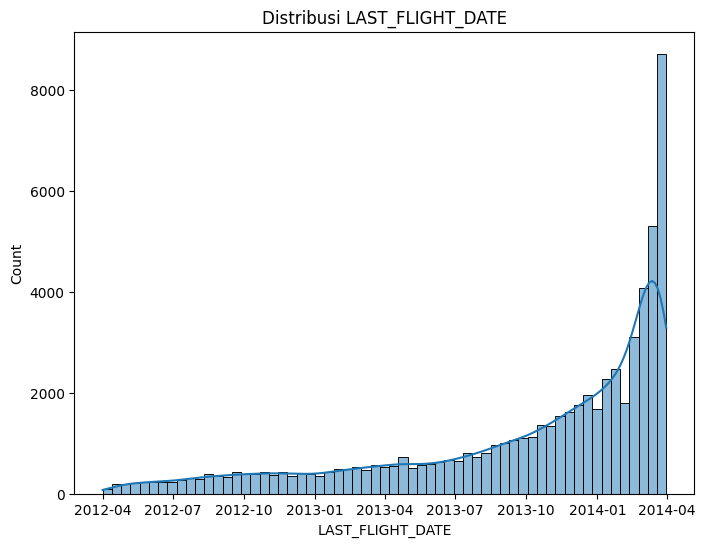

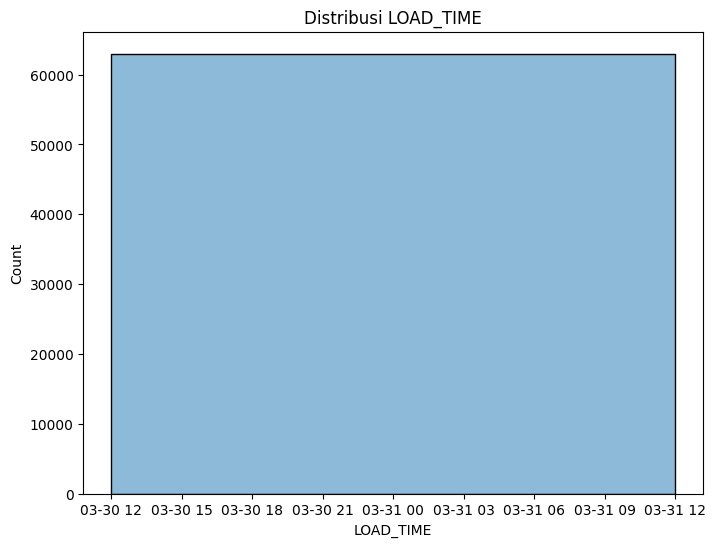

In [39]:
# Visualisasi distribusi data seiring waktu
for column in date:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
    plt.show()

Dapat terlihat dari grafik diatas bahwa terjadi kenaikan trend setiap tahunnya.

## Analisa Multivariate

<Axes: >

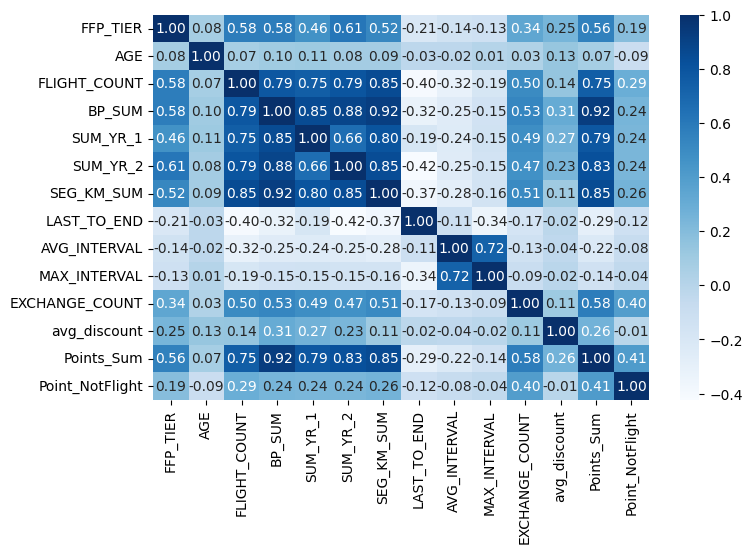

In [40]:
#Menganalisa setiap kolom numerikal menggunakan pearson corr.
plt.figure(figsize=(8, 5))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

Terdapat beberapa fitur yang memiliki korelasi yang besar, maka untuk fitur-fitur yang memiliki nilai korelasi diatas 0.80 untuk bisa langsung dieliminasi salah satunya sehingga didapatkan 1 fitur yang tidak redundant. Untuk fitur-fitur yang memiliki nilai diatai 0.70 untuk bisa dilakukan pertimbangan apakah harus digunakan atau idak agar tidak terjadi multicol.